### Load images

In [2]:
from pathlib import  Path
pip_images_path = Path('../data/processed/pipistrel/scaled-200/')

In [3]:
images = [x for x in pip_images_path.glob('*.jpg')]
images[:10]

[PosixPath('../data/processed/pipistrel/scaled-200/Pipstrel-Virus_Bodensee_2018-02-13_16-00-50.jpg'),
 PosixPath('../data/processed/pipistrel/scaled-200/Pipstrel-Virus_Bodensee_2018-02-13_16-17-54.jpg'),
 PosixPath('../data/processed/pipistrel/scaled-200/Pipstrel-Virus_Bodensee_2018-02-13_15-46-47.jpg'),
 PosixPath('../data/processed/pipistrel/scaled-200/Pipstrel-Virus_Bodensee_2018-02-13_15-52-20.jpg'),
 PosixPath('../data/processed/pipistrel/scaled-200/Pipstrel-Virus_Bodensee_2018-02-13_15-58-31.jpg'),
 PosixPath('../data/processed/pipistrel/scaled-200/Pipstrel-Virus_Bodensee_2018-02-13_15-56-18.jpg'),
 PosixPath('../data/processed/pipistrel/scaled-200/Pipstrel-Virus_Bodensee_2018-02-13_16-08-48.jpg'),
 PosixPath('../data/processed/pipistrel/scaled-200/Pipstrel-Virus_Bodensee_2018-02-13_15-51-18.jpg'),
 PosixPath('../data/processed/pipistrel/scaled-200/Pipstrel-Virus_Bodensee_2018-02-13_15-56-13.jpg'),
 PosixPath('../data/processed/pipistrel/scaled-200/Pipstrel-Virus_Bodensee_2018-02

In [4]:
from itertools import islice
import cv2

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

(123, 164, 3)
[[126 126 126 126 127 127 127 125 127 126]
 [125 124 124 125 125 126 126 126 126 125]
 [124 124 124 124 125 125 126 126 127 125]
 [124 124 125 125 125 125 126 126 128 128]
 [124 124 125 125 124 124 125 125 128 127]
 [125 125 125 125 125 125 125 126 126 126]
 [124 124 124 125 125 126 126 126 125 124]
 [123 123 123 123 124 125 125 125 125 124]
 [124 125 125 124 124 124 125 125 125 126]
 [124 125 125 125 124 125 125 124 126 127]]
Image ../data/processed/pipistrel/scaled-200/Pipstrel-Virus_Bodensee_2018-02-13_16-00-50.jpg


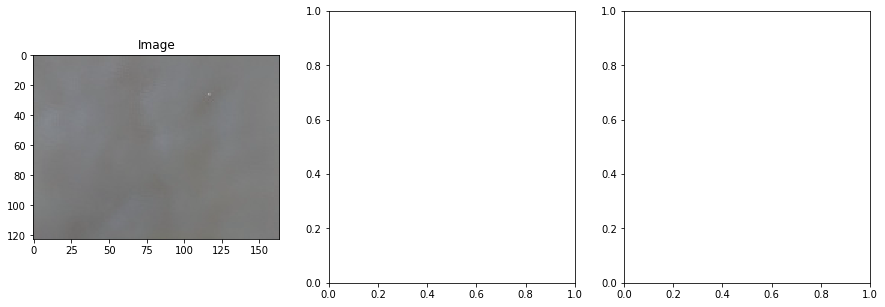

In [6]:
for image in islice(images, 1):
#     image = images_with_ship[i]

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))
    img_0 = cv2.imread(image.as_posix())
    print(img_0.shape)
    print(img_0[:10,:10,0])
#     rle_0 = masks.query(f"ImageId=='{image}'")['EncodedPixels']
#     mask_0 = masks_as_image(rle_0)
    #
    # 
#     lbl_0 = label(mask_0) 
#     print(f"label: {lbl_0}")
#     props = regionprops(lbl_0)
#     img_1 = img_0.copy()
    print ('Image', image)
#     for prop in props:
#         print('Found bbox', prop.bbox)
#         cv2.rectangle(img_1, (prop.bbox[1], prop.bbox[0]), (prop.bbox[3], prop.bbox[2]), (255, 0, 0), 2)


    ax1.imshow(img_0)
    ax1.set_title('Image')
#     ax2.set_title('Mask')
#     ax3.set_title('Image with derived bounding box')
#     ax2.imshow(mask_0[...,0], cmap='gray')
#     ax3.imshow(img_1)
#     plt.show()

In [7]:
from tqdm import tqdm
import numpy as np
from sklearn.decomposition import PCA

In [11]:
cv2.imread(images[0].as_posix()).sum(axis=2)

array([[378, 378, 378, ..., 371, 371, 374],
       [375, 372, 372, ..., 374, 377, 377],
       [372, 372, 372, ..., 377, 377, 377],
       ...,
       [353, 356, 356, ..., 371, 371, 368],
       [350, 353, 356, ..., 368, 368, 368],
       [347, 350, 353, ..., 366, 366, 366]], dtype=uint64)

In [12]:
%%time
data = []
for image in tqdm(images):  # islice(images, 50):
    img_0 = cv2.imread(image.as_posix()).sum(axis=2)
#     print(img_0.shape)
    
    datapoint = img_0.reshape(img_0.shape[0] * img_0.shape[1])
    data.append(datapoint)
data = np.array(data)
# Rescale to [0, 1] interval
data = data / (255 * 3)
data.shape

100%|██████████| 1709/1709 [00:00<00:00, 1837.38it/s]


CPU times: user 900 ms, sys: 232 ms, total: 1.13 s
Wall time: 1.13 s


(1709, 20172)

In [13]:
pca = PCA(n_components=5)

In [14]:
%%time
pca.fit(data)

CPU times: user 2.58 s, sys: 191 ms, total: 2.77 s
Wall time: 707 ms


PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
data_pca = pca.transform(data)

In [16]:
data_pca.shape

(1709, 5)

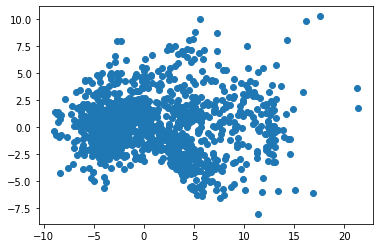

In [17]:
plt.scatter(data_pca[:, 0], data_pca[:, 1])

In [18]:
import random

Image ../data/processed/pipistrel/scaled-200/Pipstrel-Virus_Bodensee_2018-02-13_15-53-43.jpg
Image ../data/processed/pipistrel/scaled-200/Pipstrel-Virus_Bodensee_2018-02-13_16-07-05.jpg
Image ../data/processed/pipistrel/scaled-200/Pipstrel-Virus_Bodensee_2018-02-13_16-11-51.jpg
Image ../data/processed/pipistrel/scaled-200/Pipstrel-Virus_Bodensee_2018-02-13_16-13-23.jpg
Image ../data/processed/pipistrel/scaled-200/Pipstrel-Virus_Bodensee_2018-02-13_16-05-51.jpg
Image ../data/processed/pipistrel/scaled-200/Pipstrel-Virus_Bodensee_2018-02-13_16-18-53.jpg
Image ../data/processed/pipistrel/scaled-200/Pipstrel-Virus_Bodensee_2018-02-13_15-53-33.jpg
Image ../data/processed/pipistrel/scaled-200/Pipstrel-Virus_Bodensee_2018-02-13_15-53-59.jpg
Image ../data/processed/pipistrel/scaled-200/Pipstrel-Virus_Bodensee_2018-02-13_15-48-47.jpg
Image ../data/processed/pipistrel/scaled-200/Pipstrel-Virus_Bodensee_2018-02-13_15-50-55.jpg


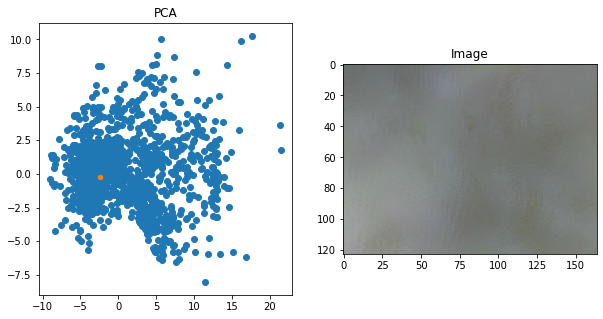

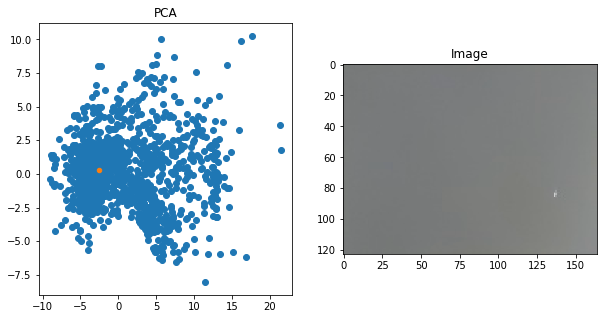

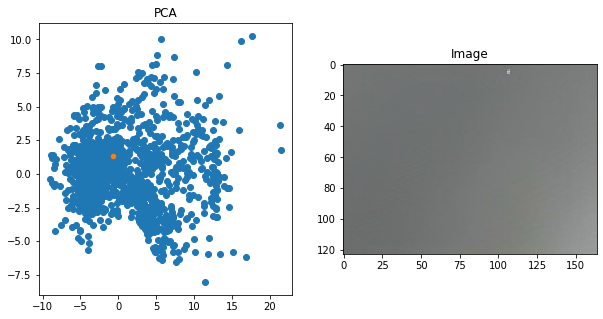

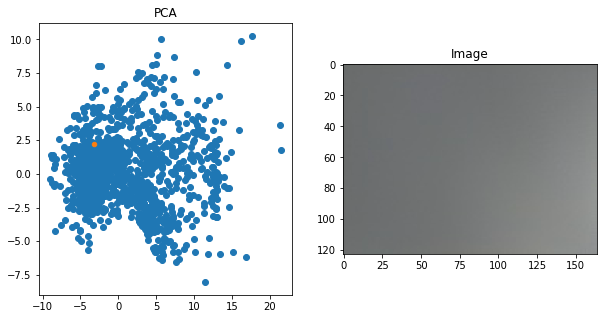

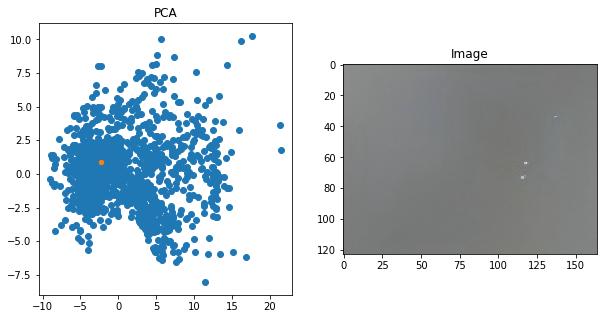

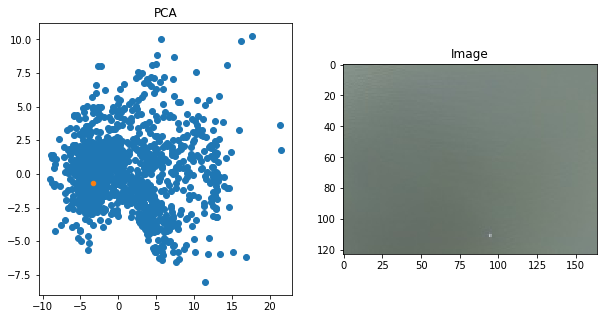

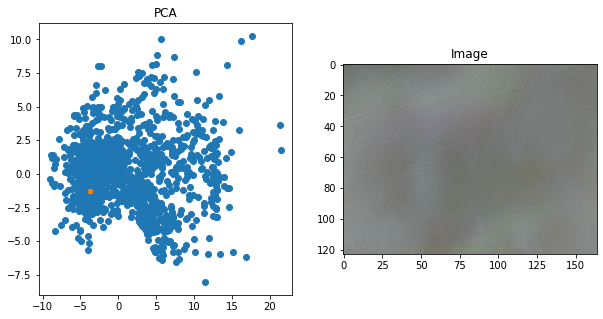

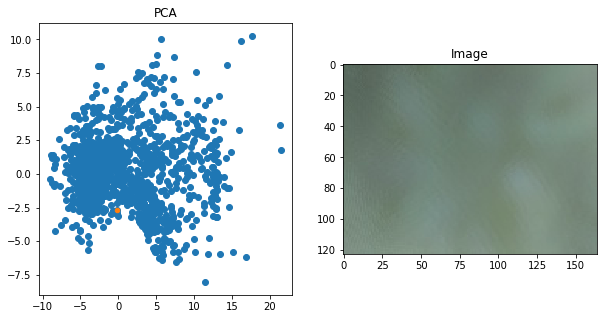

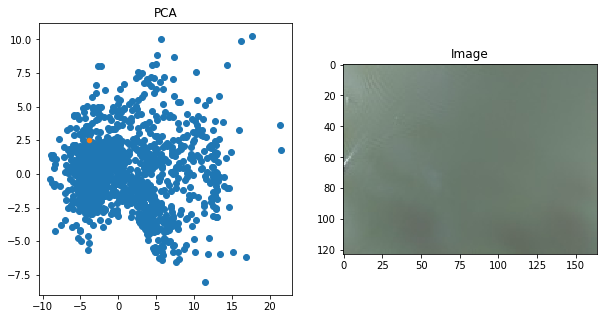

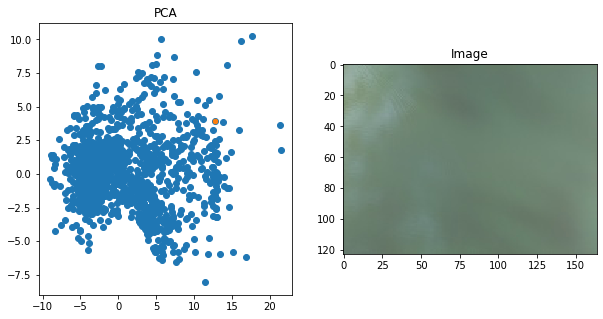

In [19]:
# images[:50]
for i, image in enumerate(random.sample(images, 10)):
#     image = images_with_ship[i]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
    img_0 = cv2.imread(image.as_posix())
#     print(img_0.shape)
    print ('Image', image)

    ax1.scatter(data_pca[:, 0], data_pca[:, 1])
    ax1.scatter(data_pca[i, 0], data_pca[i, 1], s=20)
    ax1.set_title('PCA')
    ax2.set_title('Image')
#     ax3.set_title('Image with derived bounding box')
#     ax2.imshow(mask_0[...,0], cmap='gray')
    ax2.imshow(img_0)

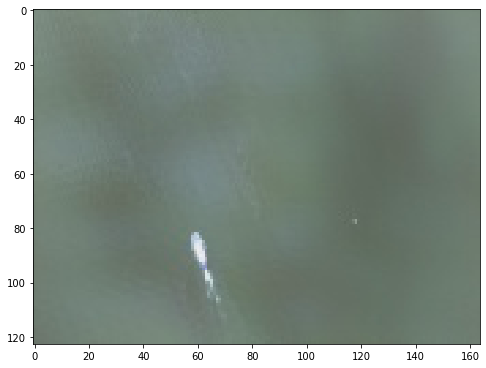

In [20]:
plt.figure(figsize=(8, 8))
plt.imshow(cv2.imread(images[8].as_posix()))

In [21]:
import pandas as pd

In [22]:
df = pd.read_csv('../data/raw/pipistrel/labelsTrain.csv')
df.head()

,filename,class,xmin,ymin,xmax,ymax,trackid
0,Pipstrel-Virus_Bodensee_2018-02-13_15-41-05.jpg,boat,2501,1537,2528,1566,1
1,Pipstrel-Virus_Bodensee_2018-02-13_15-41-05.jpg,nature,2283,2403,2318,2438,-1
2,Pipstrel-Virus_Bodensee_2018-02-13_15-41-05.jpg,nature,876,2389,917,2429,-1
3,Pipstrel-Virus_Bodensee_2018-02-13_15-41-05.jpg,nature,195,1274,235,1314,-1
4,Pipstrel-Virus_Bodensee_2018-02-13_15-41-05.jpg,nature,801,710,843,751,-1


In [23]:
df = df[df['class']=='boat']
df.head()

,filename,class,xmin,ymin,xmax,ymax,trackid
0,Pipstrel-Virus_Bodensee_2018-02-13_15-41-05.jpg,boat,2501,1537,2528,1566,1
10,Pipstrel-Virus_Bodensee_2018-02-13_15-41-06.jpg,boat,2585,1351,2611,1375,1
22,Pipstrel-Virus_Bodensee_2018-02-13_15-41-07.jpg,boat,2484,1163,2509,1189,1
34,Pipstrel-Virus_Bodensee_2018-02-13_15-41-09.jpg,boat,2502,957,2526,984,1
40,Pipstrel-Virus_Bodensee_2018-02-13_15-41-10.jpg,boat,2495,735,2518,761,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002 entries, 0 to 8045
Data columns (total 7 columns):
filename    1002 non-null object
class       1002 non-null object
xmin        1002 non-null int64
ymin        1002 non-null int64
xmax        1002 non-null int64
ymax        1002 non-null int64
trackid     1002 non-null int64
dtypes: int64(5), object(2)
memory usage: 62.6+ KB


In [25]:
df[df['filename']==images[0].name]

,filename,class,xmin,ymin,xmax,ymax,trackid
7566,Pipstrel-Virus_Bodensee_2018-02-13_16-00-50.jpg,boat,2314,526,2358,556,153


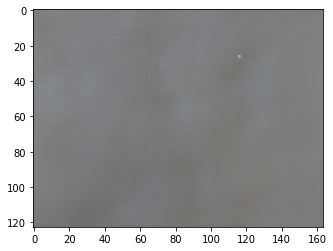

In [26]:
plt.imshow(cv2.imread(images[0].as_posix()))

In [27]:
pca_pred = dict(
    filename=[x.name for x in images],
    pca_x=data_pca[:, 0],
    pca_y=data_pca[:, 1],
    pca_z=data_pca[:, 2],
)

In [28]:
[len(pca_pred[x]) for x in pca_pred.keys()]

[1709, 1709, 1709, 1709]

In [29]:
pca_pred['pca_x']

array([-2.43978464, -2.51345861, -0.6838209 , ..., -2.4334236 ,
       -2.84573338,  7.71149864])

In [30]:
df_pca_pred = pd.DataFrame.from_dict(pca_pred)

In [31]:
df_pca_pred.head()

,filename,pca_x,pca_y,pca_z
0,Pipstrel-Virus_Bodensee_2018-02-13_16-00-50.jpg,-2.439785,-0.229385,-1.596449
1,Pipstrel-Virus_Bodensee_2018-02-13_16-17-54.jpg,-2.513459,0.292010,-2.174170
2,Pipstrel-Virus_Bodensee_2018-02-13_15-46-47.jpg,-0.683821,1.330044,1.798392
3,Pipstrel-Virus_Bodensee_2018-02-13_15-52-20.jpg,-3.154375,2.192986,3.411459
4,Pipstrel-Virus_Bodensee_2018-02-13_15-58-31.jpg,-2.274555,0.879566,1.047410


In [32]:
df_pca_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1709 entries, 0 to 1708
Data columns (total 4 columns):
filename    1709 non-null object
pca_x       1709 non-null float64
pca_y       1709 non-null float64
pca_z       1709 non-null float64
dtypes: float64(3), object(1)
memory usage: 53.5+ KB


In [33]:
df_test_pred = df_pca_pred.join(df.set_index('filename'), on='filename')

In [34]:
df_test_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 1708
Data columns (total 10 columns):
filename    2239 non-null object
pca_x       2239 non-null float64
pca_y       2239 non-null float64
pca_z       2239 non-null float64
class       1002 non-null object
xmin        1002 non-null float64
ymin        1002 non-null float64
xmax        1002 non-null float64
ymax        1002 non-null float64
trackid     1002 non-null float64
dtypes: float64(8), object(2)
memory usage: 192.4+ KB


In [35]:
df_boats = df_test_pred[df_test_pred['class']=='boat'][['filename', 'pca_x', 'pca_y', 'pca_z']]

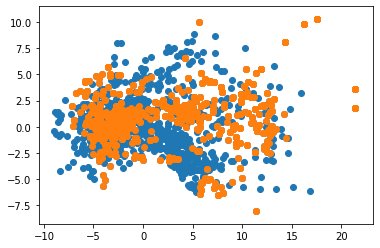

In [36]:
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.scatter(df_boats.pca_x, df_boats.pca_y)

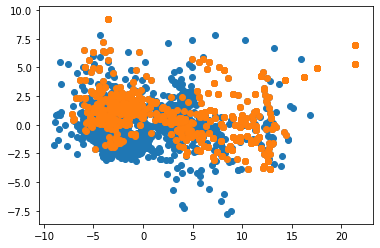

In [37]:
plt.scatter(data_pca[:, 0], data_pca[:, 2])
plt.scatter(df_boats.pca_x, df_boats.pca_z)

In [38]:
train_names = pd.read_csv('../data/raw/pipistrel/labelsTrain.csv')
train_names = train_names['filename']

In [39]:
test_names = pd.read_csv('../data/raw/pipistrel/labelsTest.csv')
test_names = test_names['filename']

In [40]:
train_names.shape

(8048,)

In [41]:
test_names.shape

(8651,)

In [42]:
names = [x.name for x in images]

In [43]:
train_names.isin(names).mean()

1.0

In [44]:
test_names.isin(names).mean()

1.0

In [45]:
len(names)

1709

In [46]:
len(set(names))

1709

In [47]:
names = set(names)

In [48]:
names.difference_update(set(test_names.values))

In [49]:
len(names)

833

In [50]:
names.difference_update(set(train_names.values))

In [51]:
len(names)

12

In [52]:
set(test_names).intersection(set(train_names))

set()

In [53]:
names

{'Pipstrel-Virus_Bodensee_2018-02-13_15-44-37.jpg',
 'Pipstrel-Virus_Bodensee_2018-02-13_15-44-40.jpg',
 'Pipstrel-Virus_Bodensee_2018-02-13_16-02-12.jpg',
 'Pipstrel-Virus_Bodensee_2018-02-13_16-02-18.jpg',
 'Pipstrel-Virus_Bodensee_2018-02-13_16-03-03.jpg',
 'Pipstrel-Virus_Bodensee_2018-02-13_16-05-04.jpg',
 'Pipstrel-Virus_Bodensee_2018-02-13_16-08-13.jpg',
 'Pipstrel-Virus_Bodensee_2018-02-13_16-10-47.jpg',
 'Pipstrel-Virus_Bodensee_2018-02-13_16-12-42.jpg',
 'Pipstrel-Virus_Bodensee_2018-02-13_16-12-43.jpg',
 'Pipstrel-Virus_Bodensee_2018-02-13_16-12-49.jpg',
 'Pipstrel-Virus_Bodensee_2018-02-13_16-14-30.jpg'}

In [54]:
test = images[0]
asd = Path('data/raw/processed/')

In [55]:
asd.parent

PosixPath('data/raw')

In [56]:
parent = images[0].parent

Image Pipstrel-Virus_Bodensee_2018-02-13_16-02-18.jpg
Image Pipstrel-Virus_Bodensee_2018-02-13_15-44-37.jpg
Image Pipstrel-Virus_Bodensee_2018-02-13_16-12-42.jpg
Image Pipstrel-Virus_Bodensee_2018-02-13_16-08-13.jpg
Image Pipstrel-Virus_Bodensee_2018-02-13_15-44-40.jpg
Image Pipstrel-Virus_Bodensee_2018-02-13_16-03-03.jpg
Image Pipstrel-Virus_Bodensee_2018-02-13_16-12-43.jpg
Image Pipstrel-Virus_Bodensee_2018-02-13_16-10-47.jpg
Image Pipstrel-Virus_Bodensee_2018-02-13_16-05-04.jpg
Image Pipstrel-Virus_Bodensee_2018-02-13_16-14-30.jpg
Image Pipstrel-Virus_Bodensee_2018-02-13_16-02-12.jpg
Image Pipstrel-Virus_Bodensee_2018-02-13_16-12-49.jpg


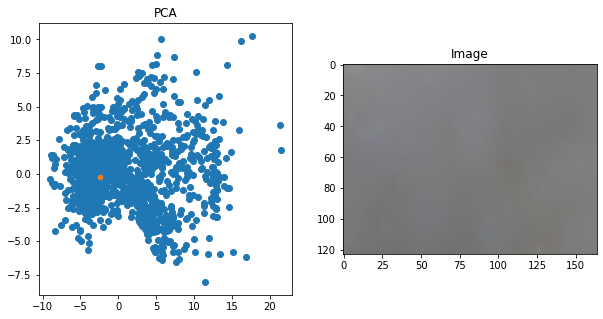

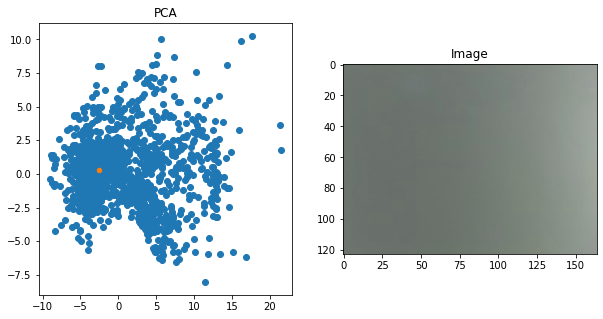

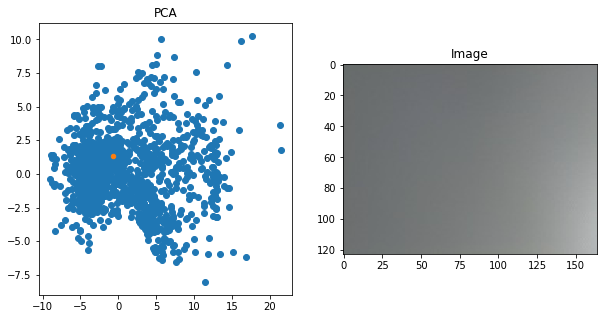

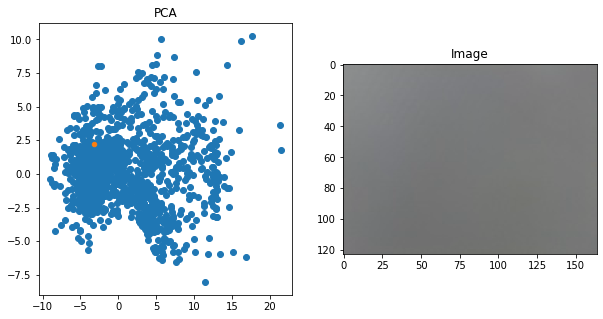

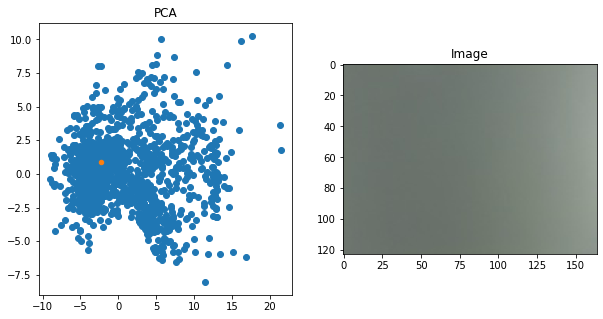

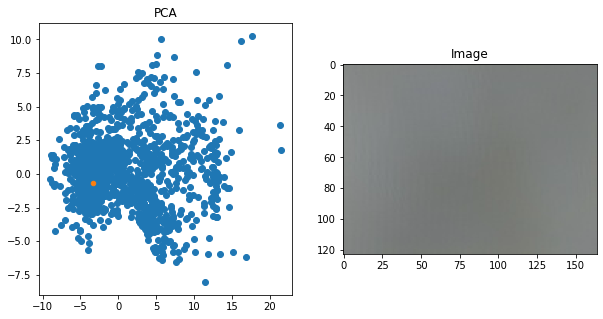

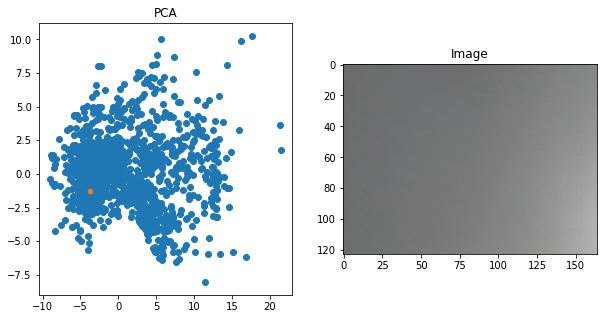

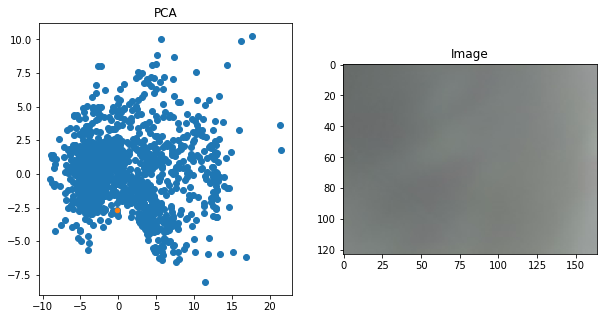

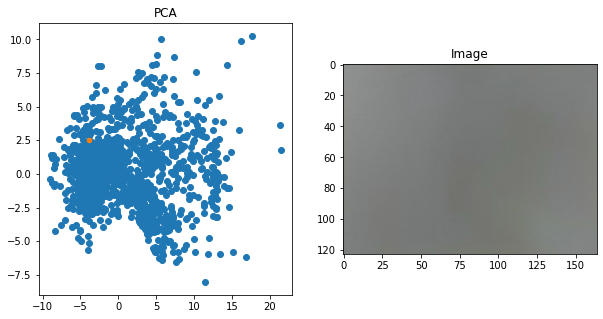

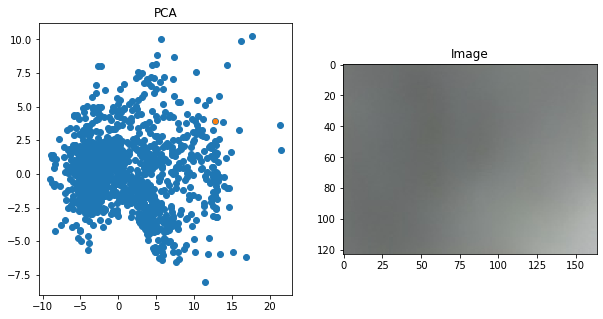

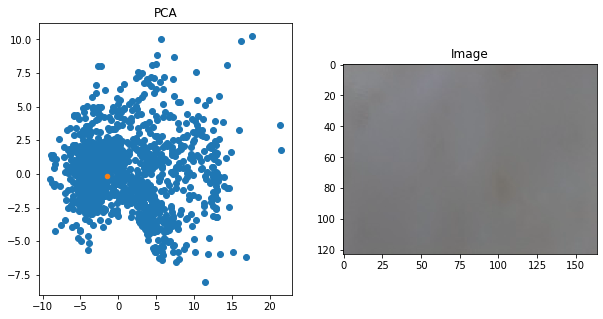

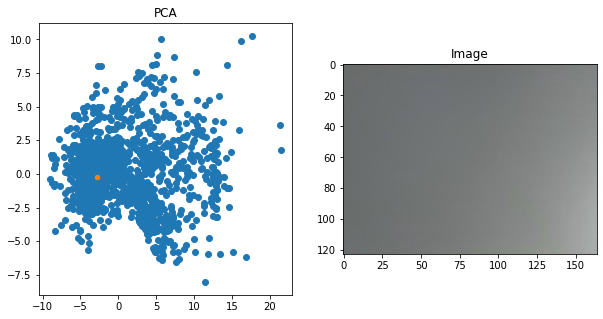

In [57]:
for i, name in enumerate(names):
#     image = images_with_ship[i]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
    img_0 = cv2.imread((parent / Path(name)).as_posix())
#     print(img_0.shape)
    print ('Image', name)

    ax1.scatter(data_pca[:, 0], data_pca[:, 1])
    ax1.scatter(data_pca[i, 0], data_pca[i, 1], s=20)
    ax1.set_title('PCA')
    ax2.set_title('Image')
#     ax3.set_title('Image with derived bounding box')
#     ax2.imshow(mask_0[...,0], cmap='gray')
    ax2.imshow(img_0)